# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Assignment 9

#### Yogendra Singh  &emsp;  214161014 <br><br> M Shanmukh Rao &emsp;   214161004

<br><br><b>Q.1 ROC of Chebyshev inequality-based classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<br><br><b>1.(a) Write the following function in python to generate 𝑛 number of points in a ring on 2𝐷 plane centered at$[c_{x},c_{y}]$ of respective inner and outer radius rinner and 𝑟outer.
𝑔𝑒𝑛𝑅𝑎𝑛𝑑𝑃𝑜𝑖𝑛𝑡𝑠𝐼𝑛𝑅𝑖𝑛𝑔(rinner,router,[cx,cy],n)

In [2]:
def genRandPointsInRing(ri,ro,cx,cy,n):
    points = []
    center = np.array((cx,cy))
    if(ri<0 or ro<ri):
        print("not a valid value for inner or outer radius")
        return
    for i in range(n):
        x1 = np.random.randn()
        x2 = np.random.randn()
        vector = np.array((x1,x2))
        norm_vector = vector / np.linalg.norm(vector)
        rho = np.random.uniform(ri**2,ro**2)
        point = np.sqrt(rho) * norm_vector
        translated_point = point + center
        points.append(translated_point)
        
    return points

<br><b>1.(b) (b) Using the above function generate 𝑛+ = 250 points belonging to
the positive class in a circle of radius 𝑟circle = 5 centered at [cx,cy]T=[0,0]T. Using the same function generate 𝑛 = 350 points belonging
to the negative class in a ring of radii 𝑟inner = 4, 𝑟outer = 8 and centered at [cx,cy]T= [0,0]. Display the scatter plot of the positive class points and negative class points in red and blue colors respectively.

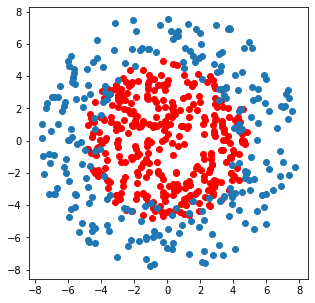

In [3]:
#red positive blue negative
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,5,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(4,8,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)

<br><b>1.(c)Use the Chebyshev inequality-based classifier on the positive class
points and plot the ROC by varying the threshold 𝜆 in the interval
[0.01,10] in steps of 0.05.

C:\Users\Shanmukh\AppData\Local\Temp\ipykernel_6660\3840216176.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


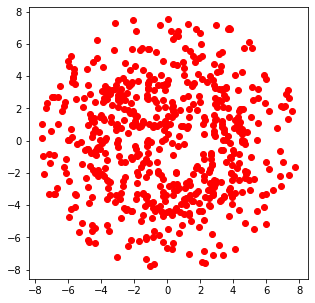

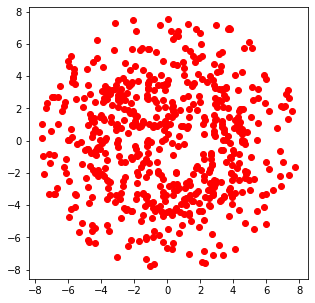

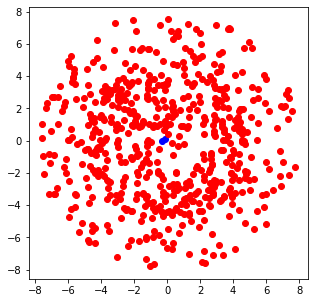

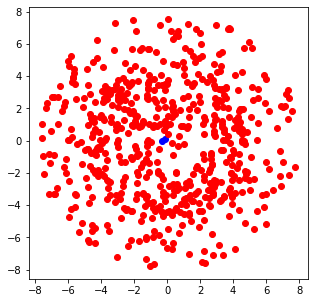

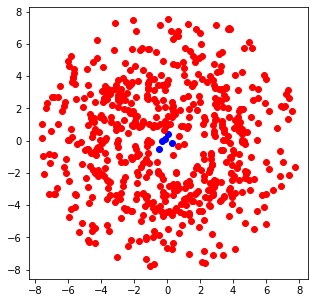

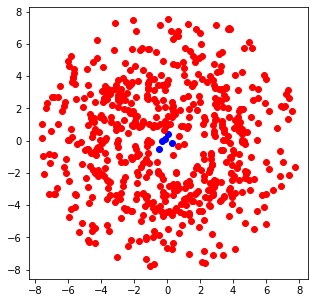

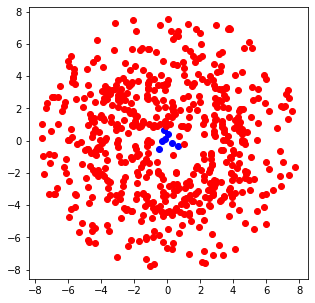

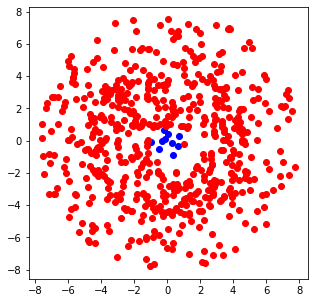

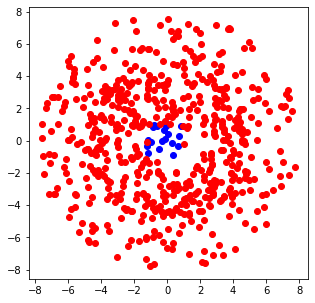

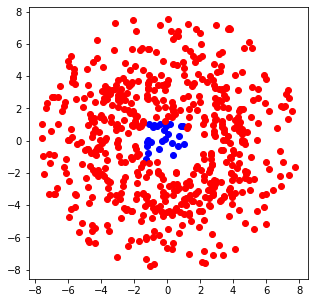

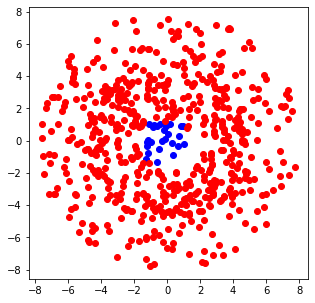

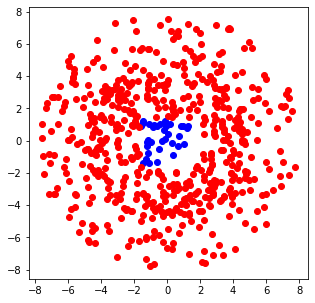

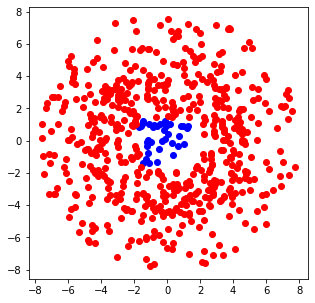

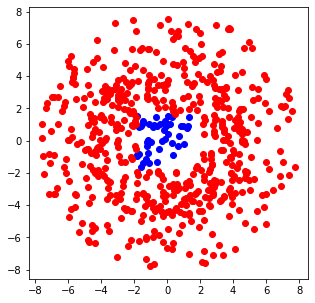

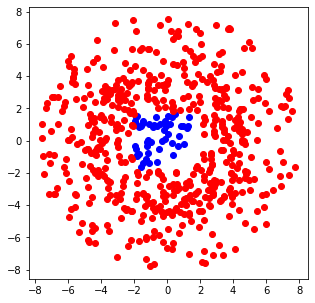

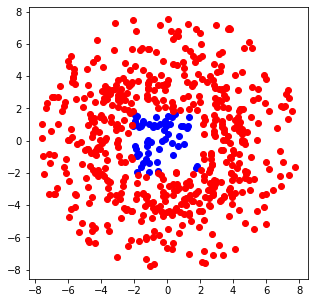

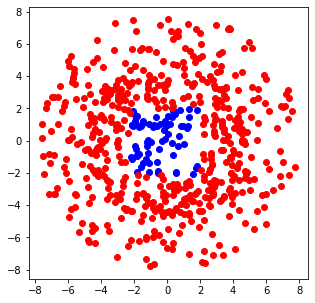

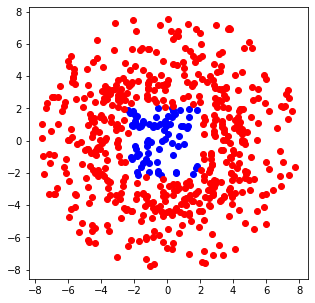

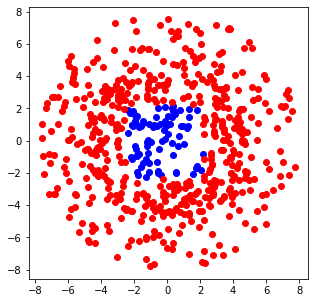

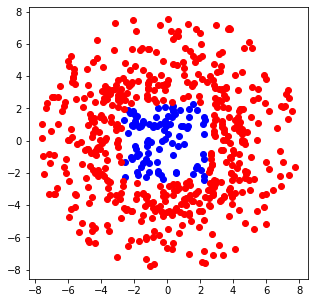

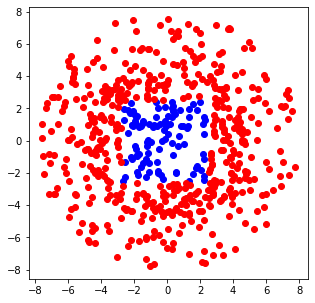

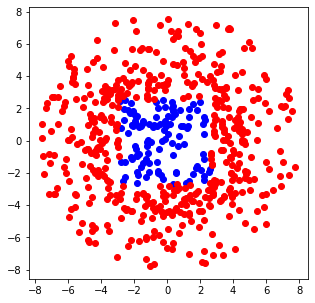

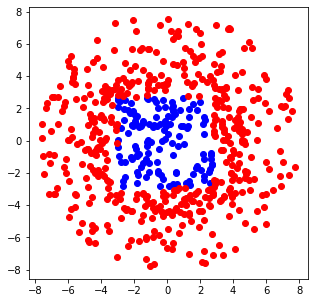

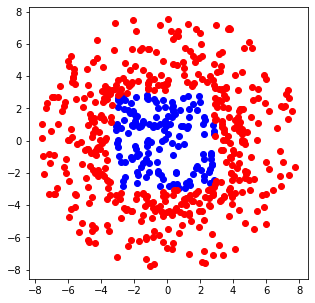

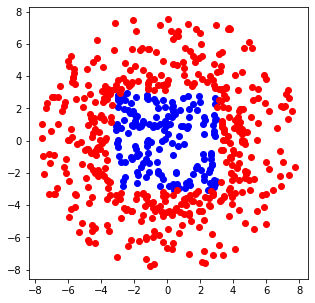

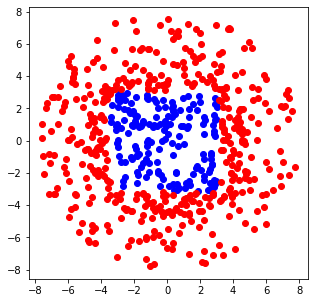

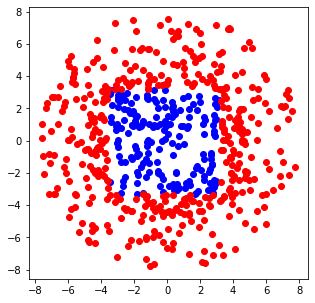

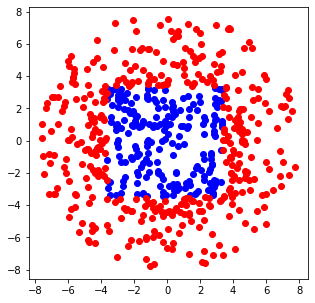

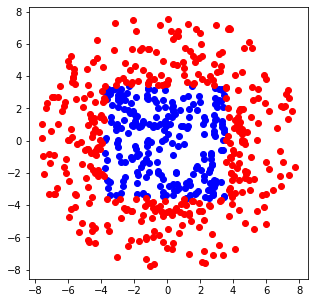

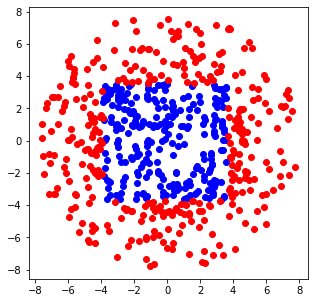

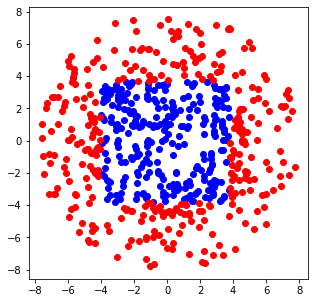

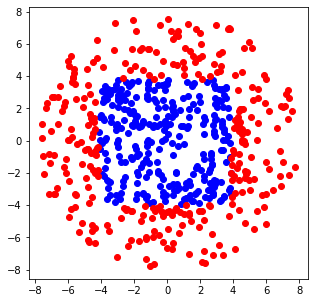

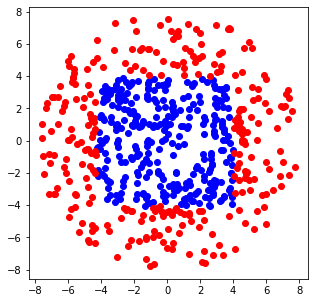

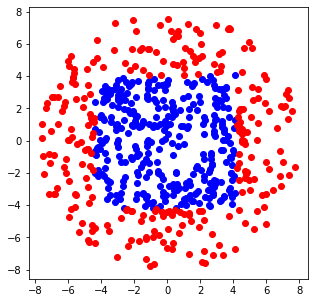

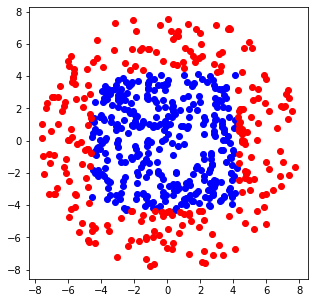

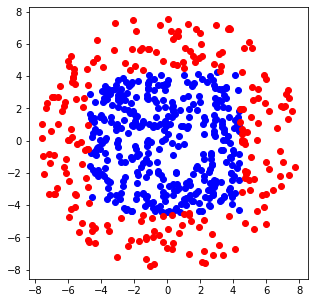

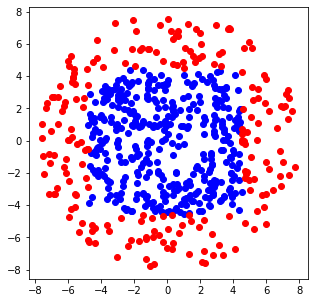

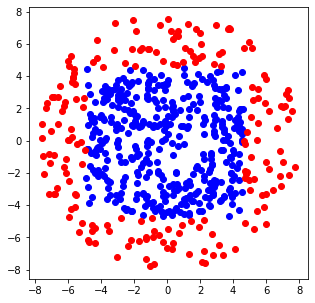

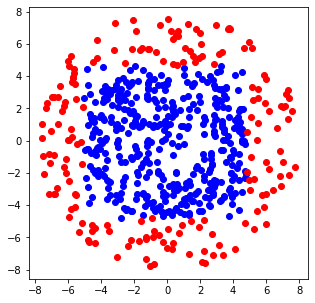

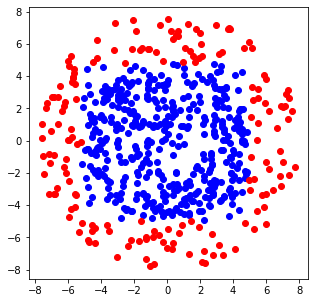

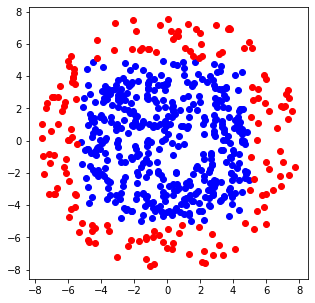

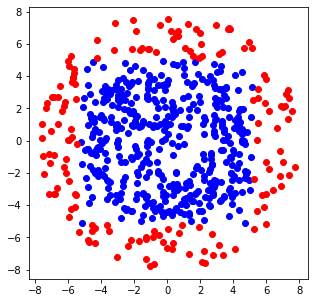

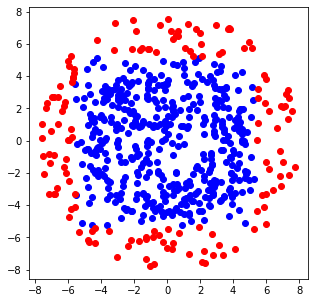

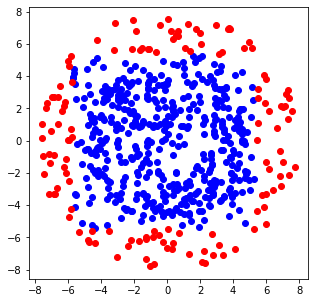

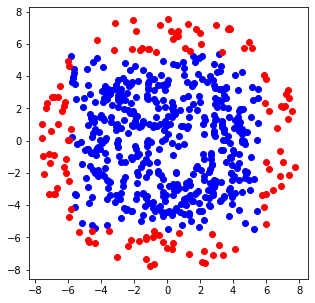

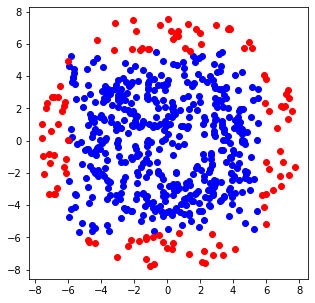

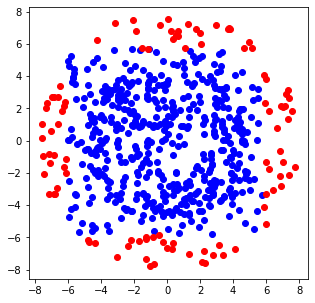

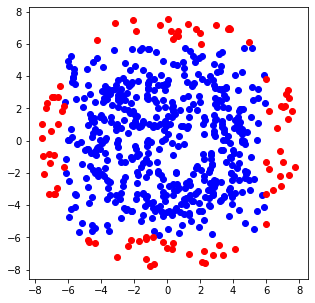

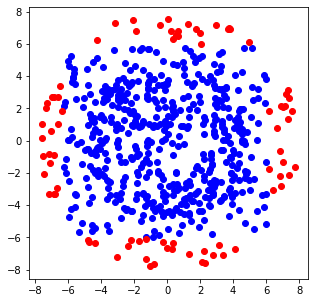

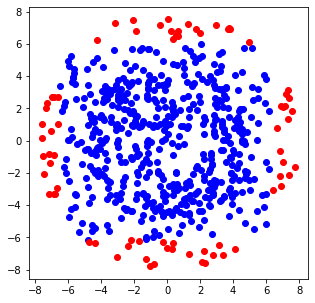

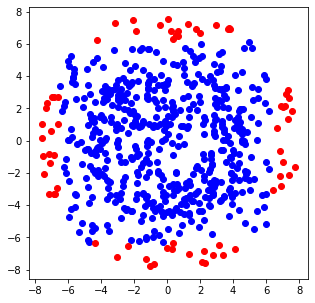

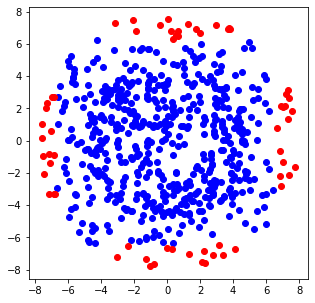

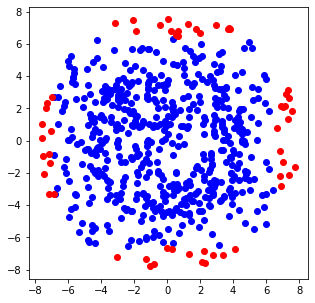

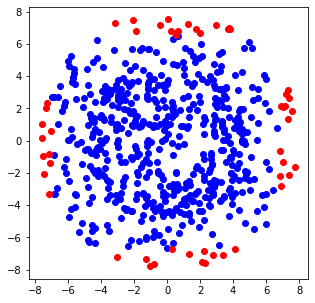

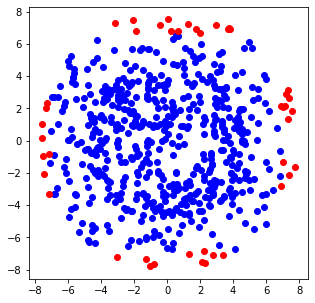

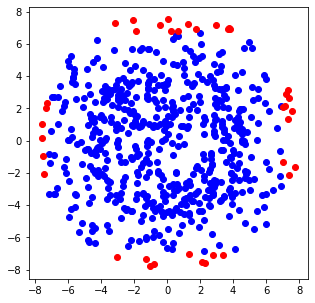

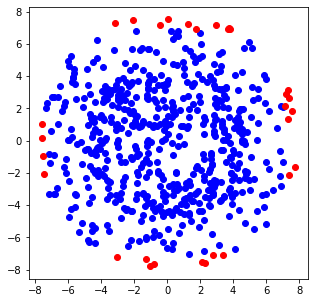

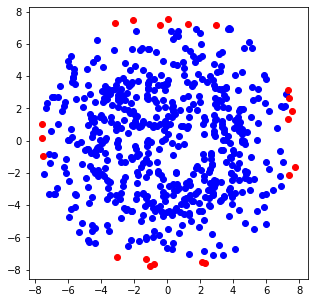

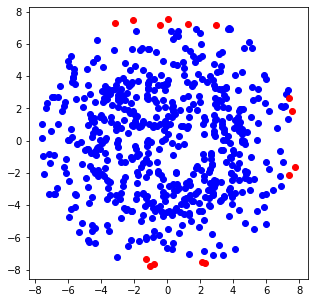

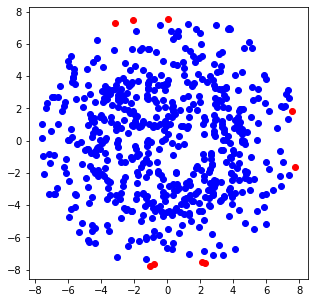

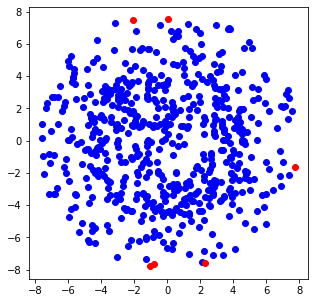

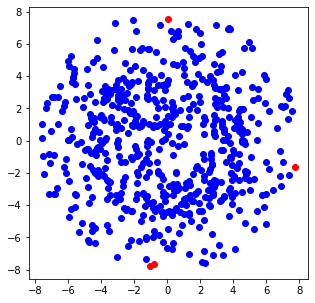

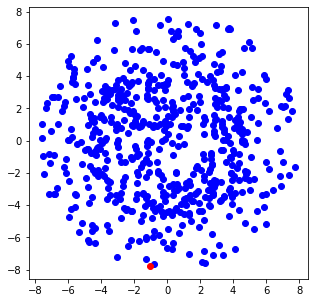

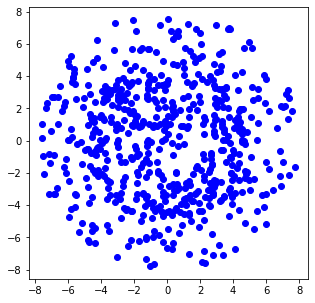

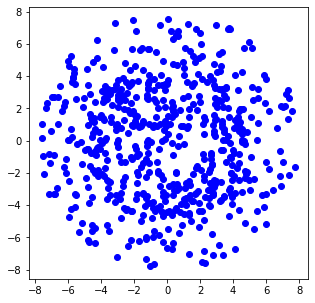

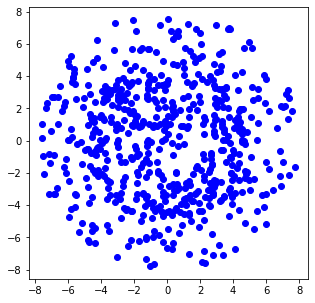

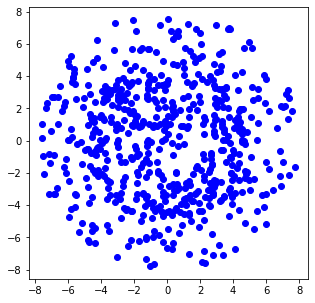

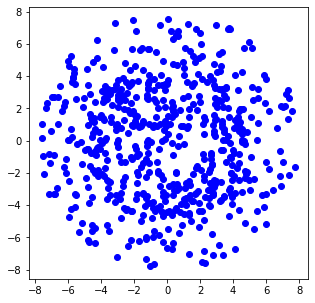

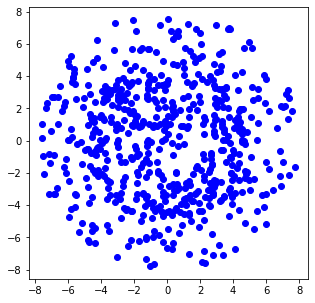

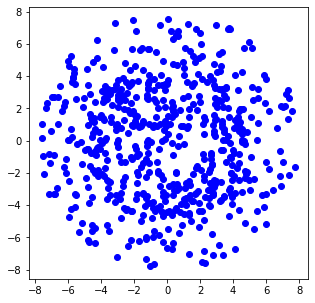

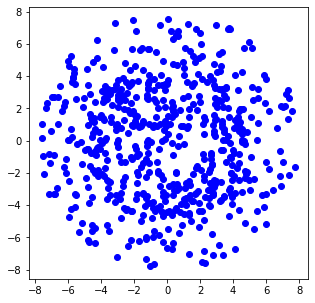

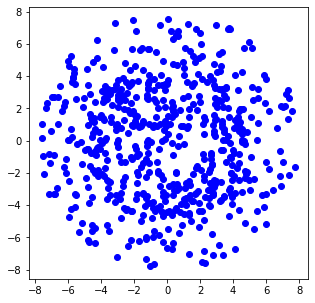

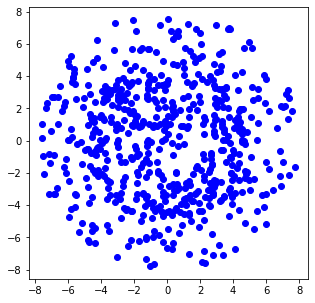

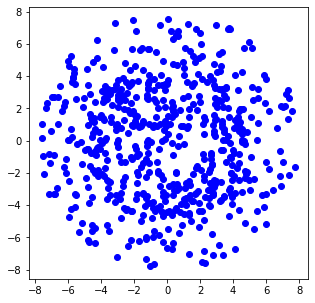

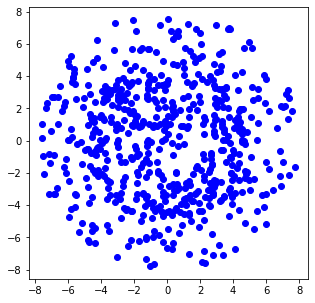

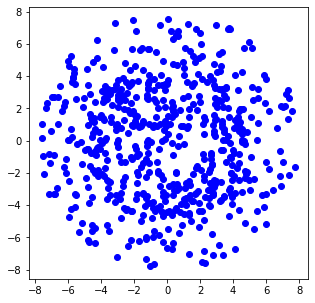

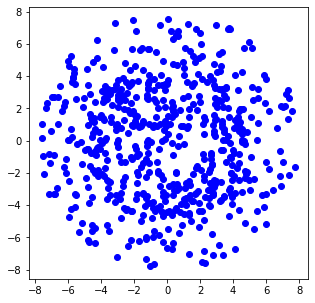

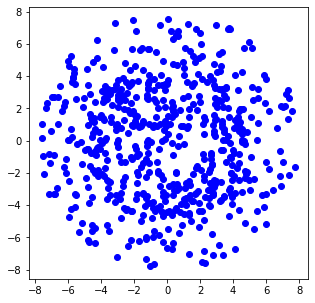

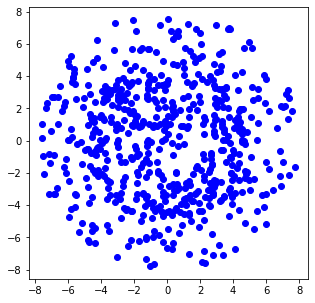

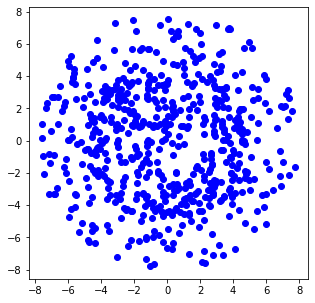

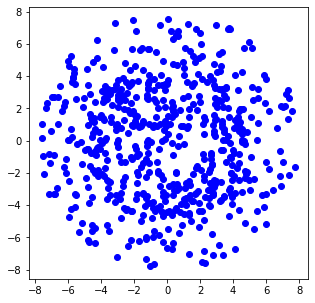

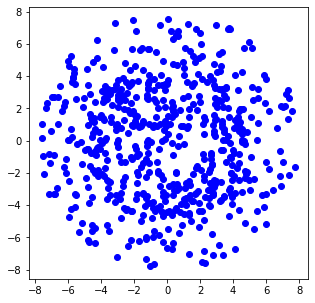

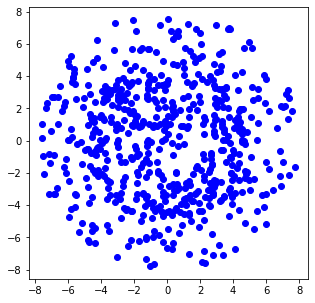

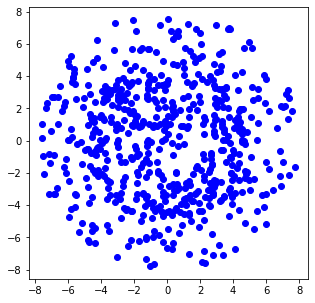

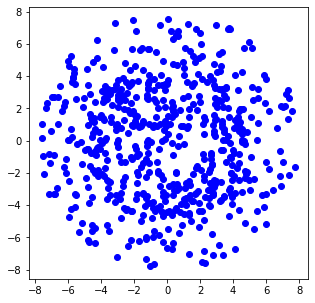

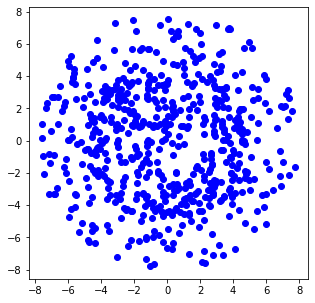

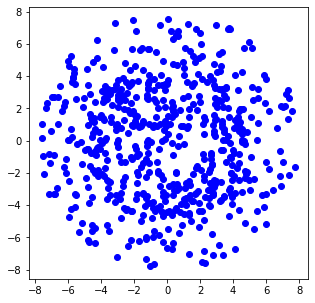

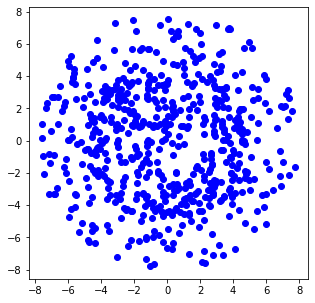

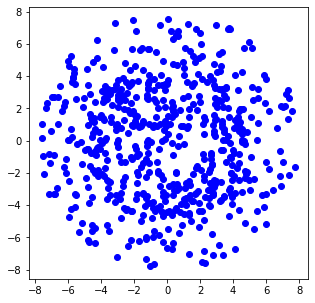

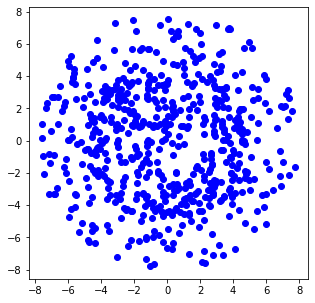

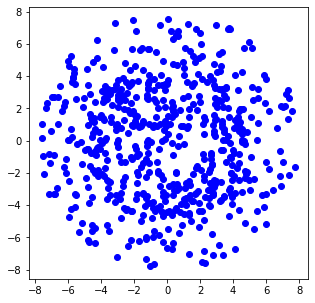

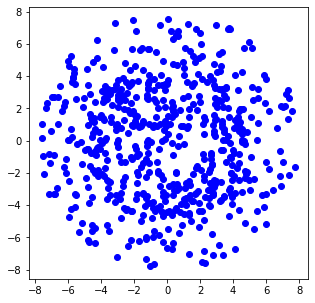

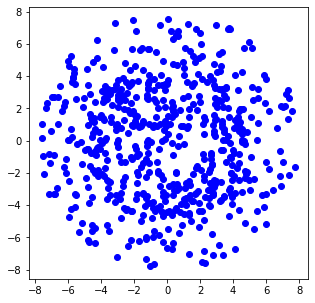

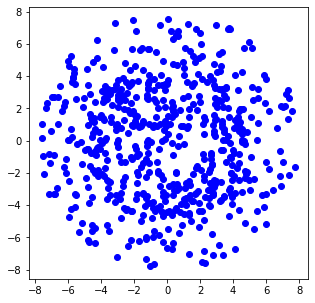

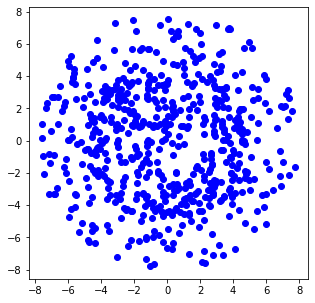

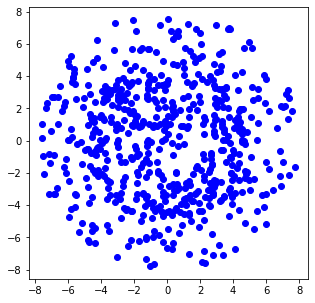

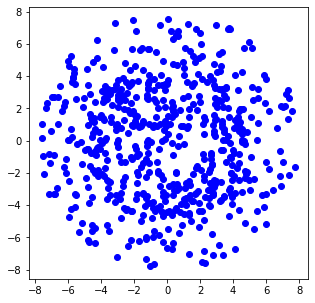

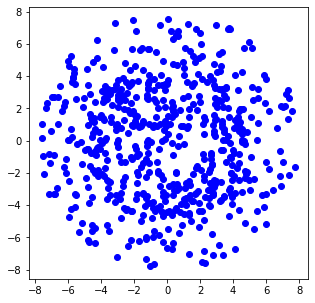

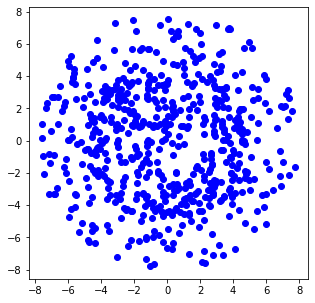

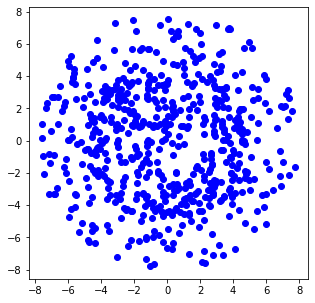

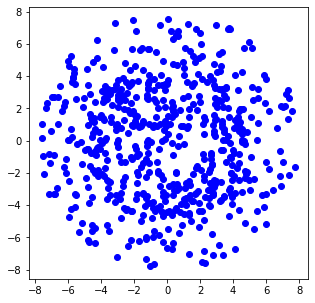

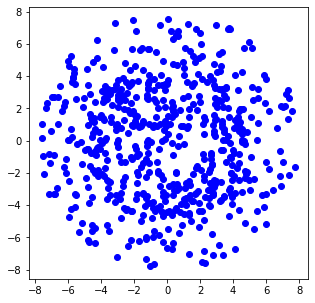

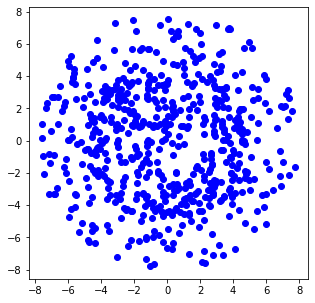

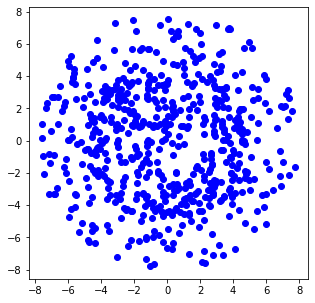

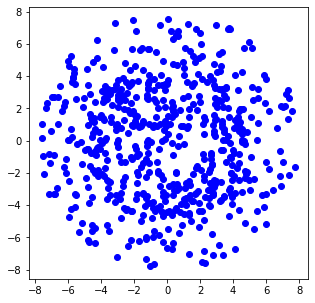

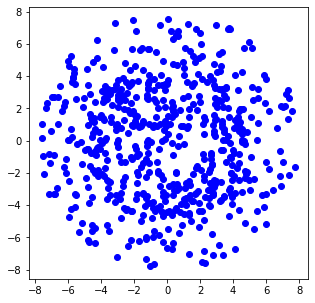

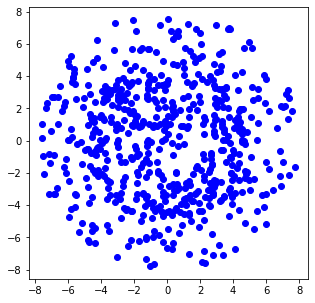

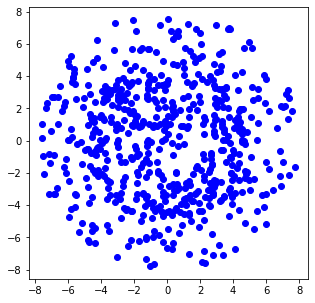

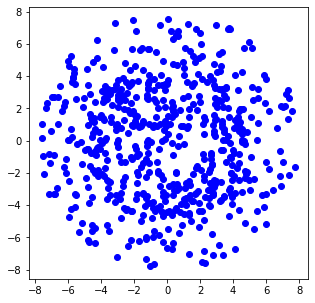

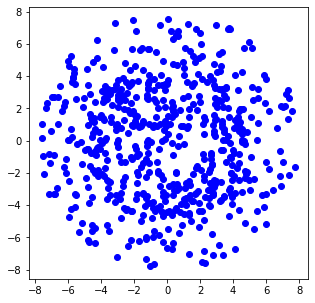

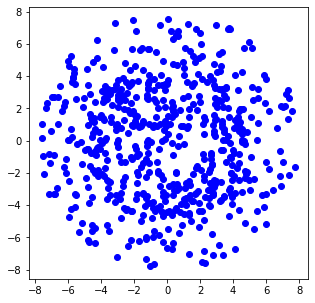

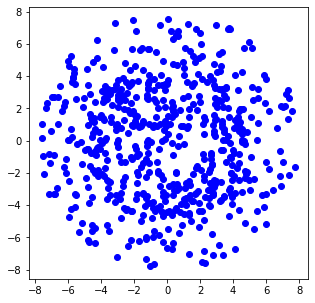

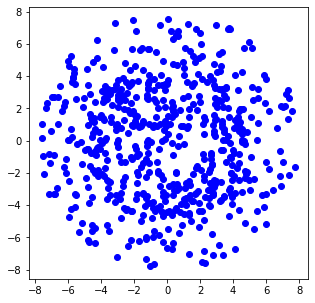

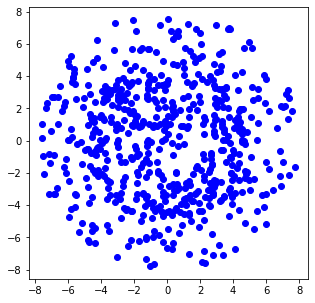

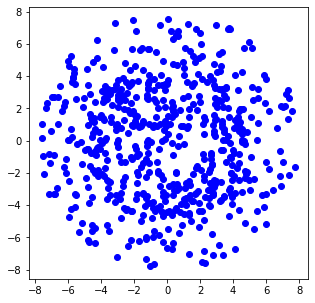

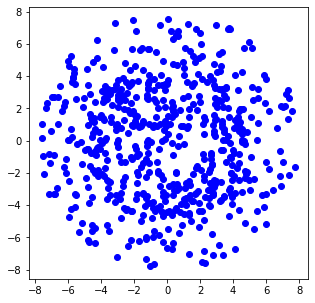

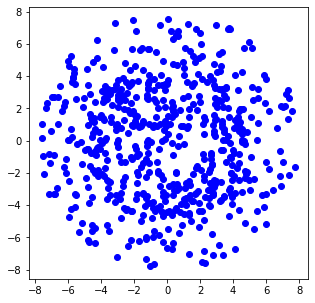

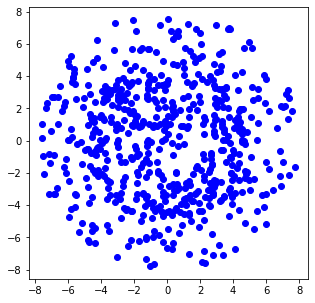

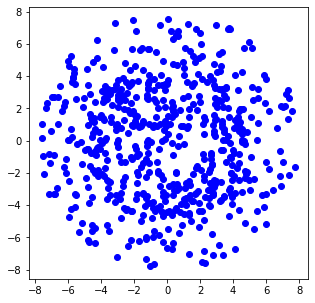

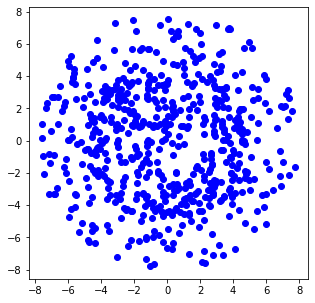

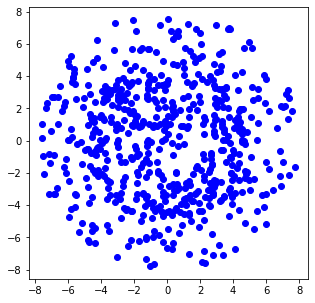

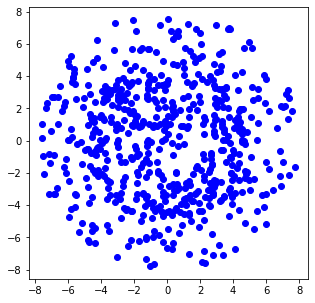

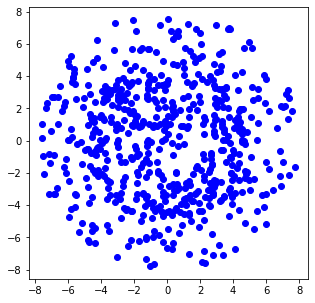

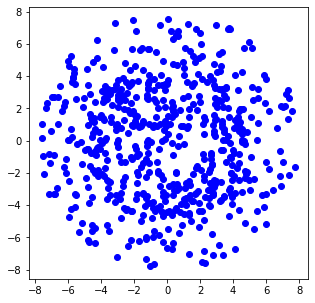

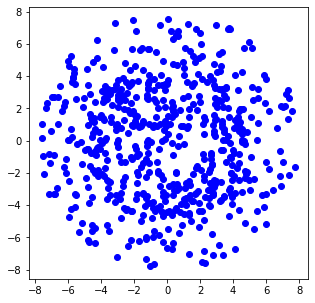

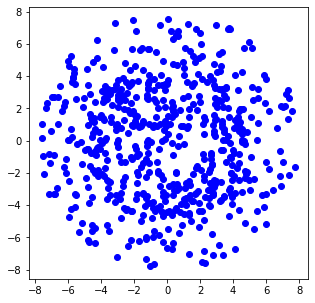

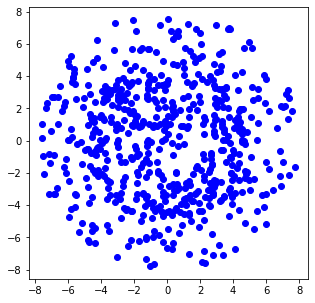

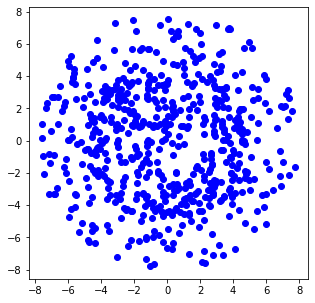

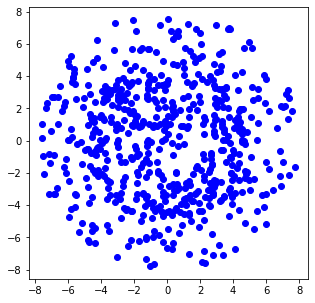

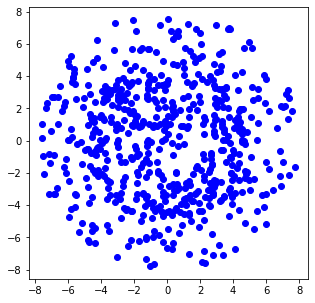

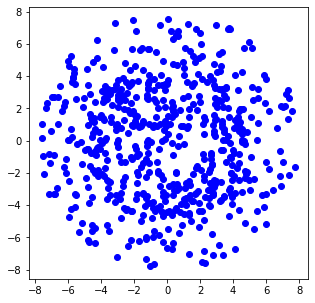

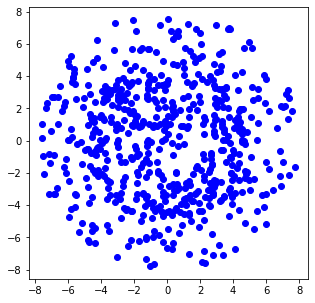

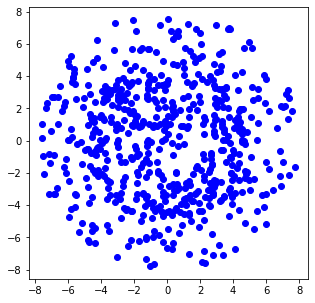

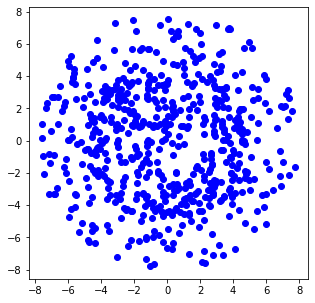

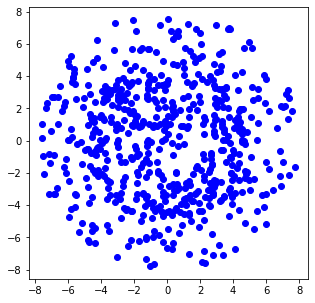

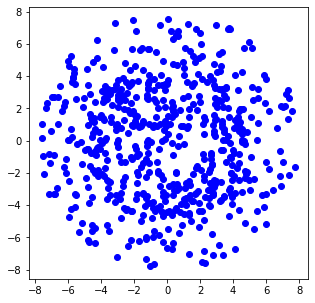

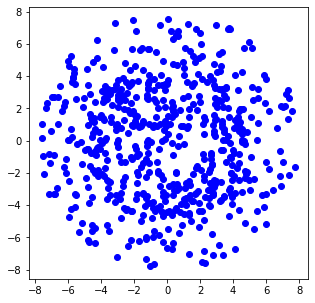

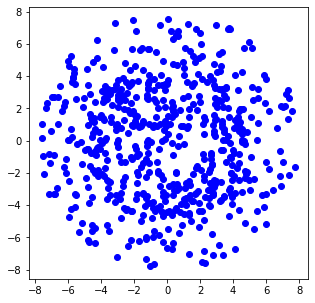

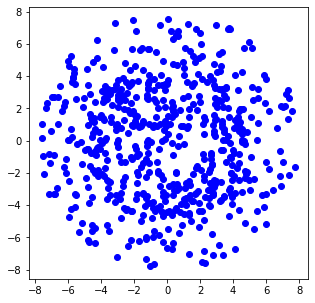

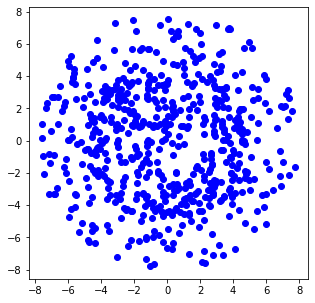

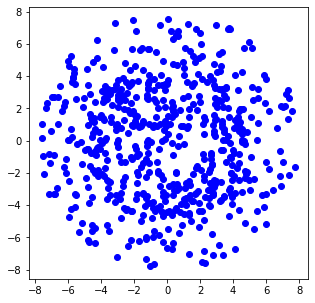

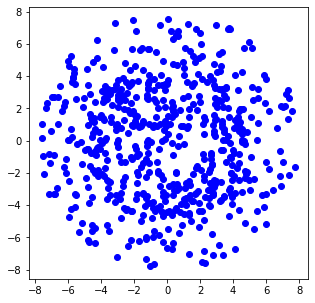

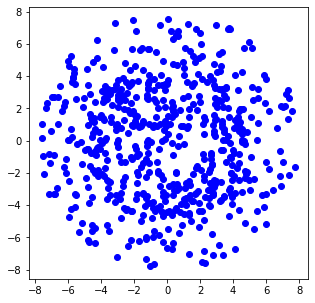

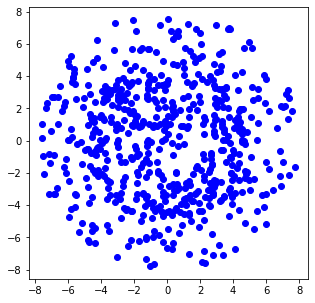

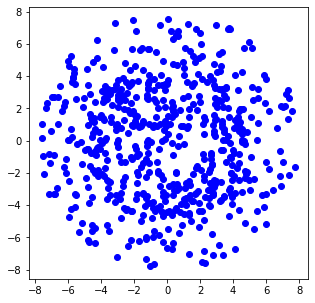

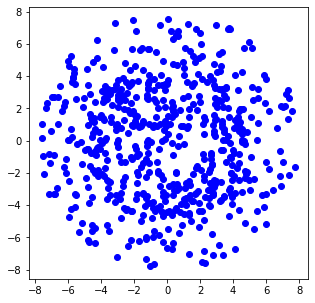

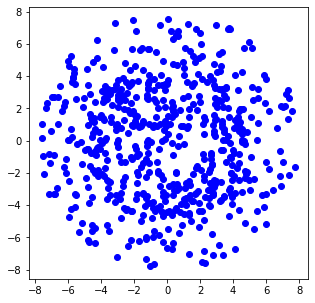

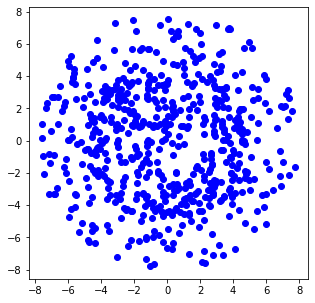

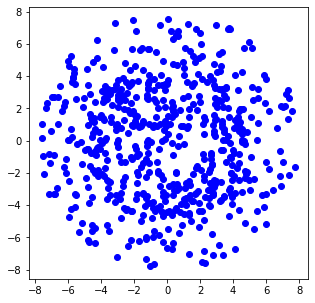

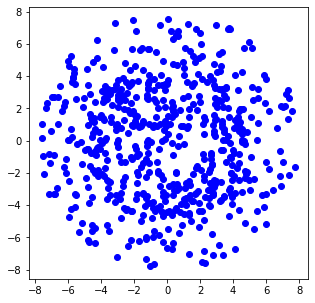

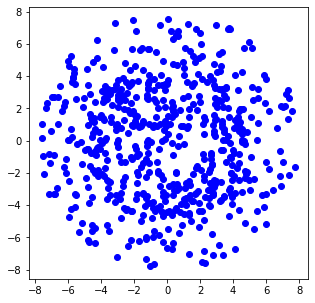

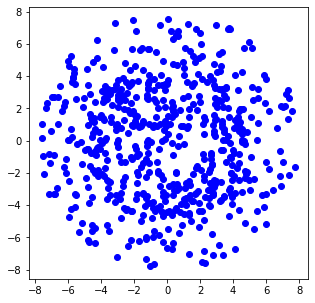

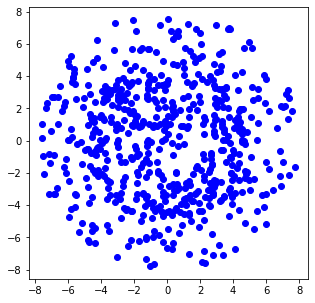

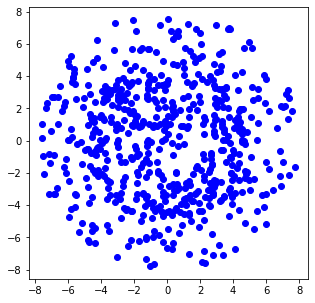

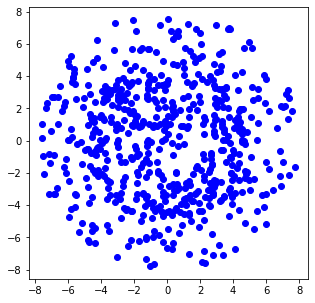

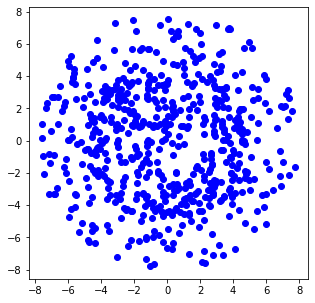

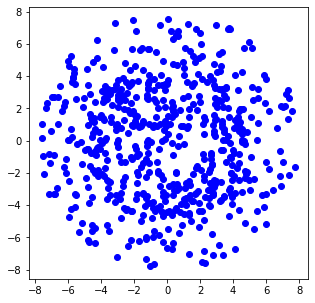

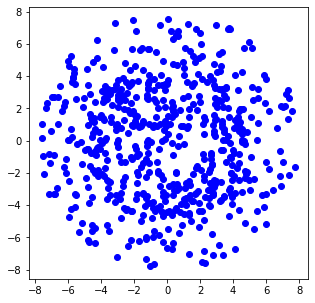

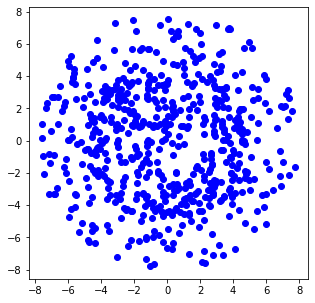

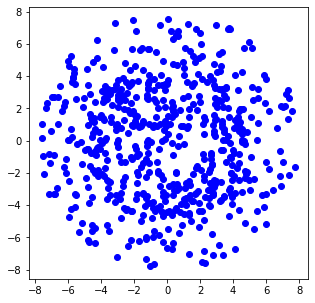

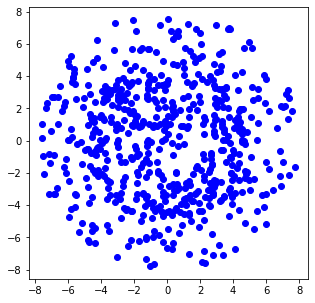

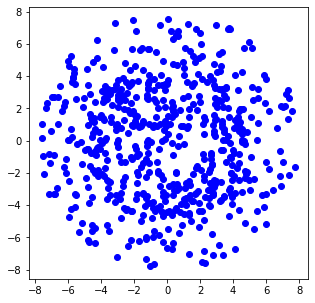

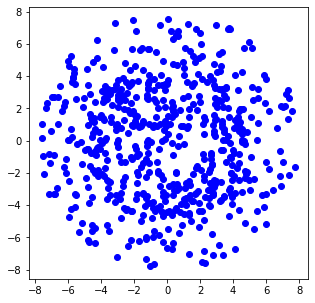

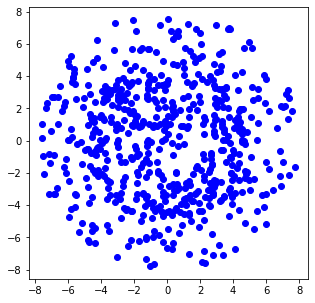

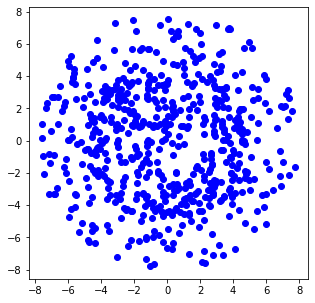

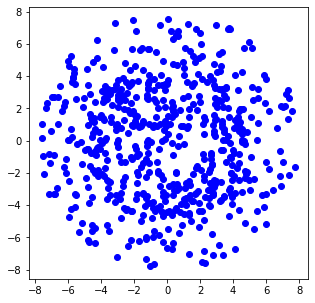

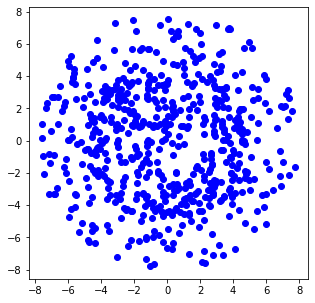

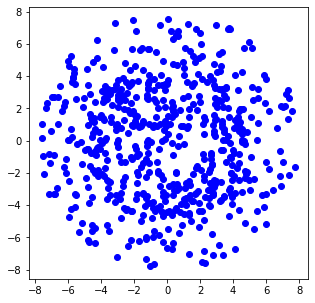

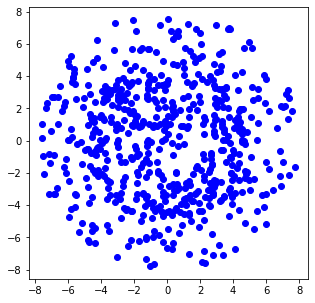

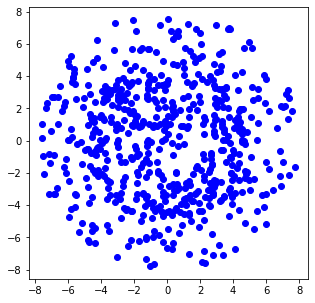

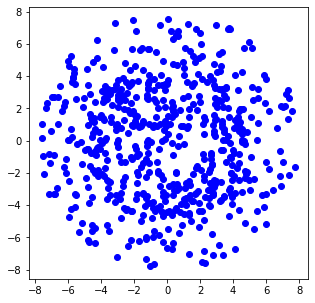

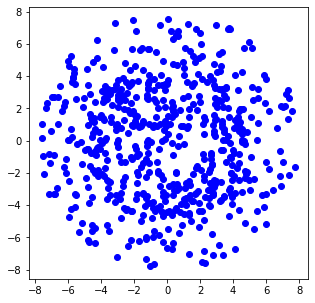

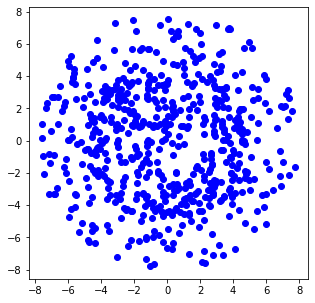

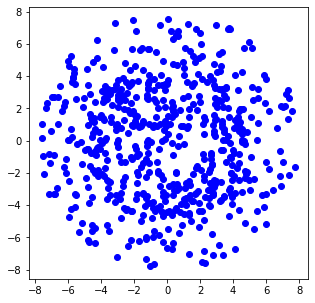

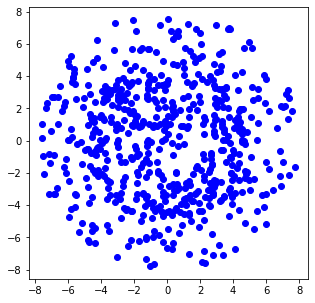

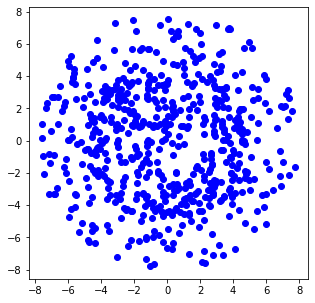

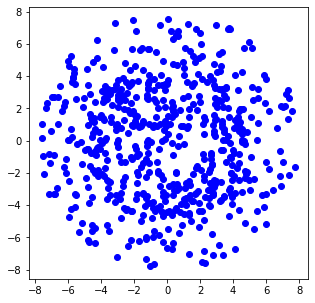

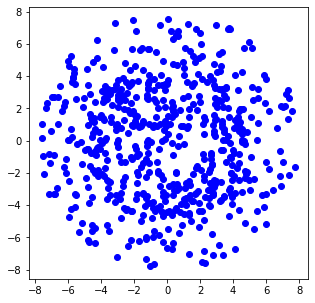

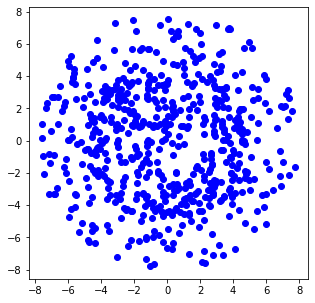

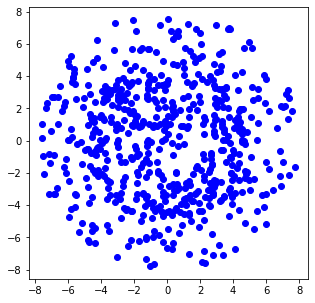

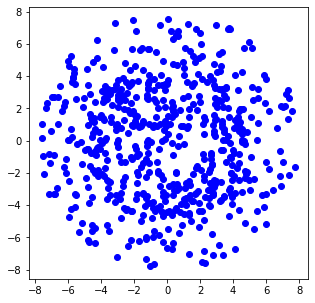

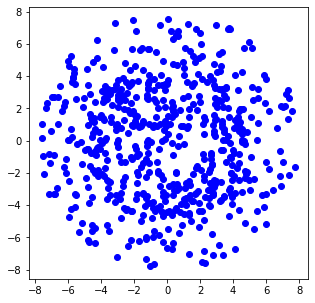

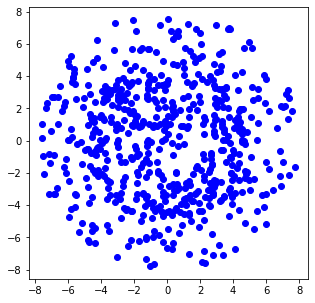

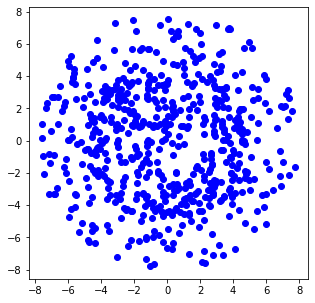

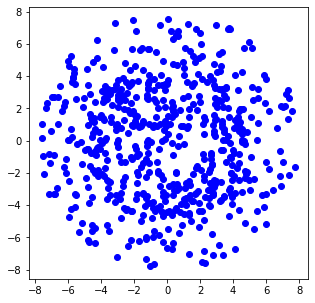

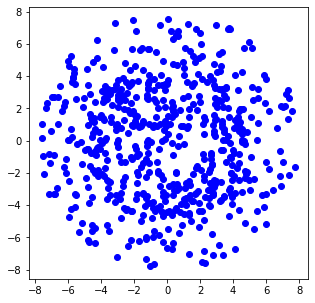

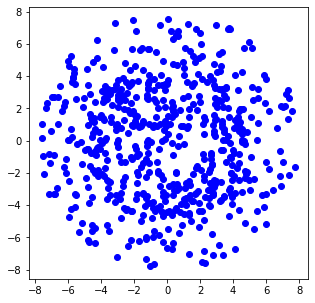

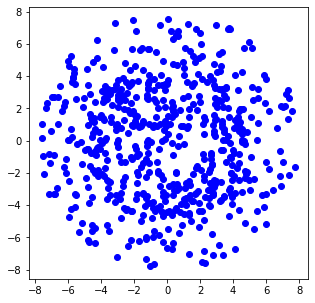

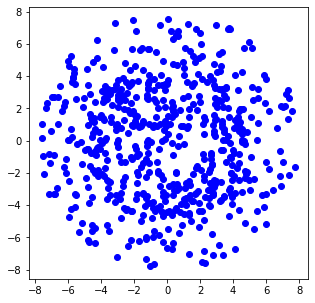

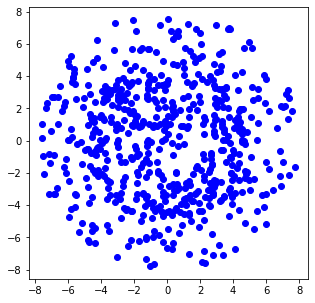

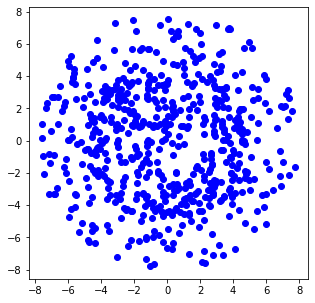

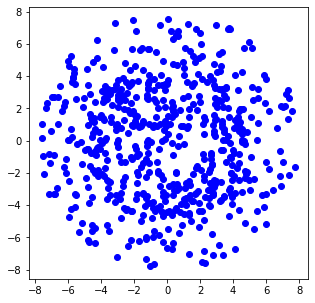

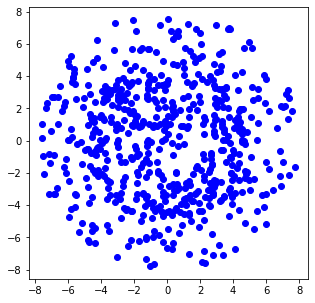

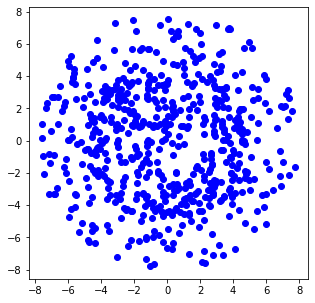

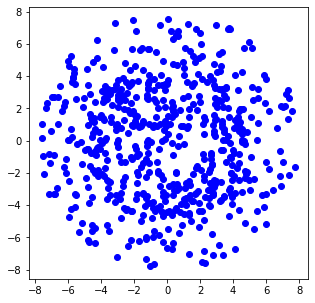

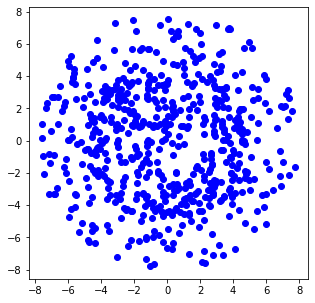

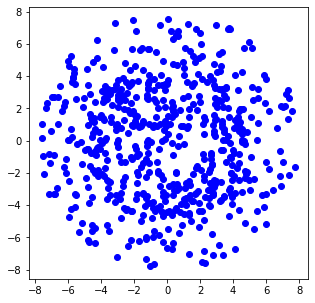

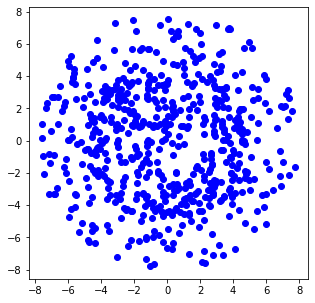

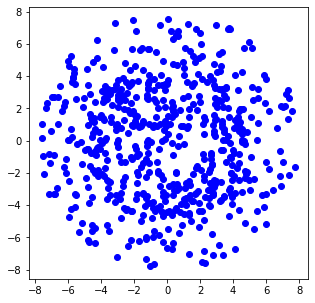

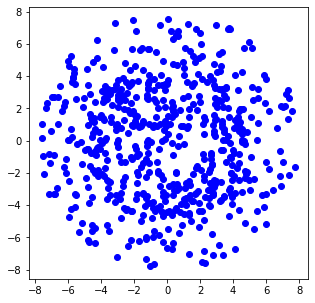

In [4]:
#blue positive red negative
y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
for j in range(len(lamda)):
    TP = 0
    FP = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            #since 0 is positive class lets check if its FP or TP
            if ((x[i],y[i]) in positive_points):
                TP = TP + 1
            else:
                FP = FP + 1
        else:
            one_class.append((x[i],y[i]))
    zero_class = np.array(zero_class)
    one_class = np.array(one_class)
    plt.figure(figsize=(5,5))
    if(np.shape(zero_class)[0]!=0):
        plt.scatter(zero_class[:,0],zero_class[:,1],color='blue')
    if(np.shape(one_class)[0]!=0):
        plt.scatter(one_class[:,0],one_class[:,1],color='red')    

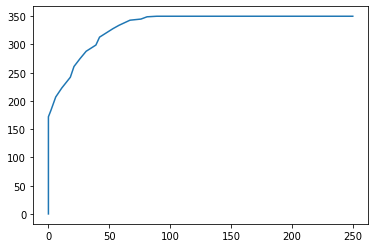

In [5]:

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)

plt.plot(FP,TP)         

<br><b>Q1.(d) Experiment with non-overlapping classes ( 𝑟circle < 𝑟inner ) and
overlapping classes (𝑟circle > 𝑟inner) and plot the ROCs for the same.
Please note that 𝑟outer is always greater than 𝑟cicle and 𝑟inner. 


### (d) Overlapping Classes
##### (i) circle with r=5 and ring with $r_{inner}$ = 4 and $r_{outer}$ = 8

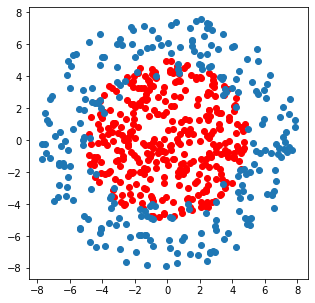

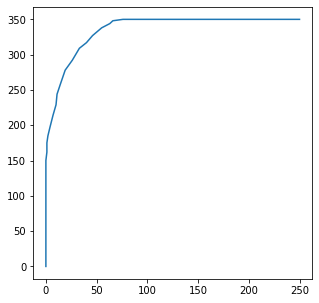

In [6]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,5,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(4,8,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)

fig1 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)      

##### (ii) circle with r=6 and ring with $r_{inner}$ = 4 and $r_{outer}$ = 8

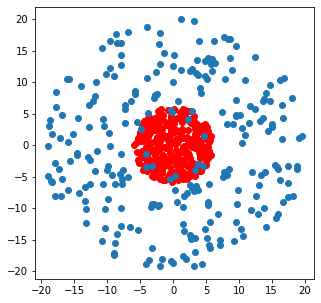

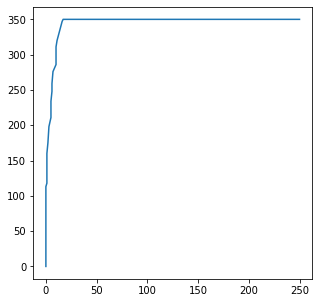

In [7]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,6,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(4,20,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)
fig2 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)       

##### (iii) circle with r=10 and ring with $r_{inner}$ = 4 and $r_{outer}$ = 16

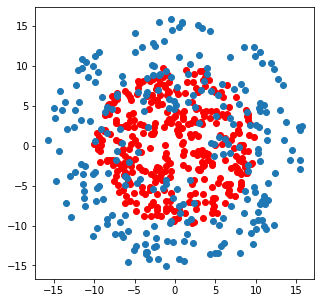

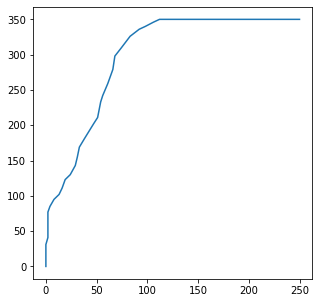

In [8]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,10,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(4,16,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)

fig3 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)       


##### (iv) circle with r=7 and ring with $r_{inner}$ = 6 and $r_{outer}$ = 8

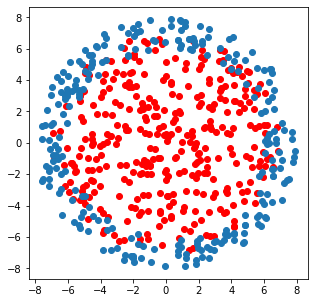

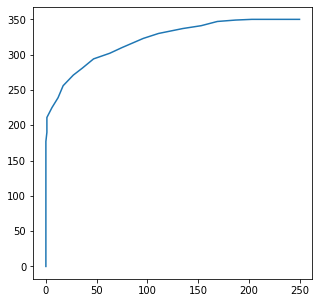

In [9]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,7,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(6,8,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)

fig4 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)       


##### (v) circle with r=3 and ring with $r_{inner}$ = 2 and $r_{outer}$ = 8

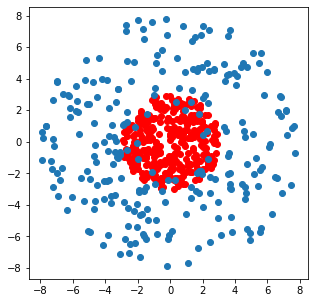

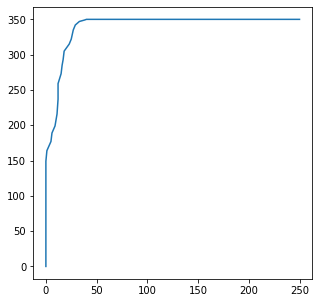

In [10]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,3,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(2,8,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)
    
fig5 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)

### (d) Non Overlapping Classes
##### (i) circle with r=3 and ring with $r_{inner}$ = 4 and $r_{outer}$ = 8

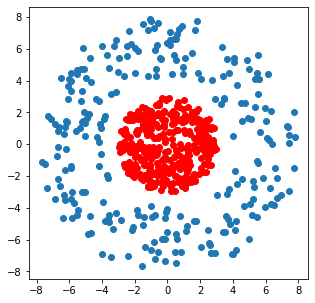

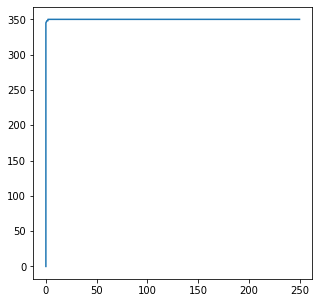

In [11]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,3,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(4,8,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)
    
fig11 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)       


##### (ii) circle with r=2 and ring with $r_{inner}$ = 4 and $r_{outer}$ = 7

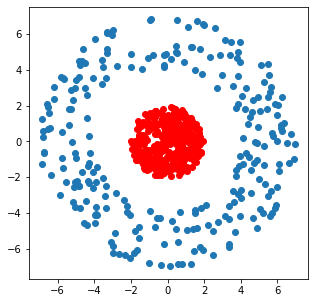

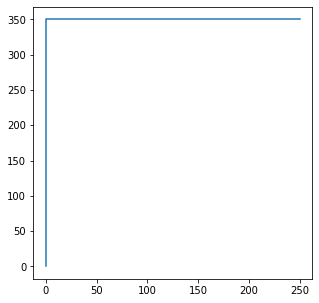

In [12]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,2,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(4,7,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)
    
fig12 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)       

##### (iii) circle with r=5 and ring with $r_{inner}$ = 6 and $r_{outer}$ = 9

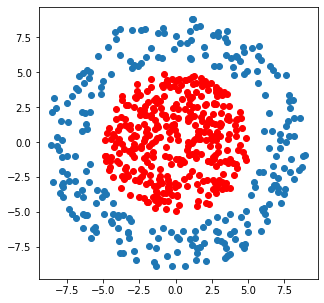

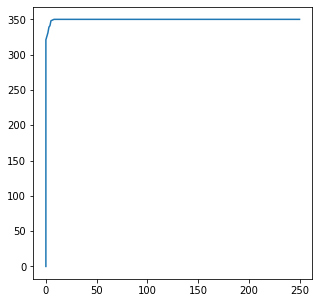

In [13]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,5,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(6,9,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)
    
fig13 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)       


##### (iv) circle with r=6 and ring with $r_{inner}$ = 6 and $r_{outer}$ = 8

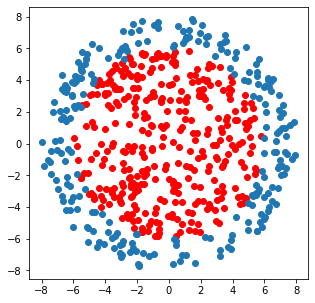

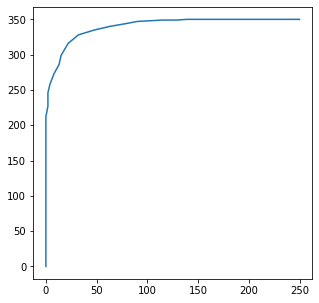

In [14]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,6,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(6,8,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)
    
fig14 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)       


##### (v) circle with r=2 and ring with $r_{inner}$ = 3 and $r_{outer}$ = 9

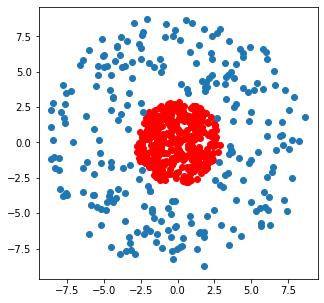

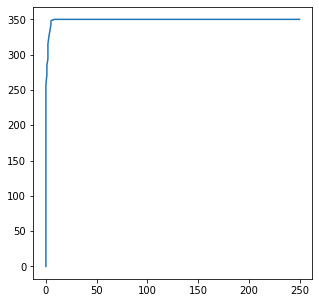

In [15]:
plt.figure(figsize=(5,5))
positive_points = np.array((genRandPointsInRing(0,2.9,0,0,350)))
x_circle = positive_points[:,0]
y_circle = positive_points[:,1]
plt.scatter(x_circle,y_circle,color='red')
negative_points = np.array((genRandPointsInRing(3.1,9,0,0,250)))
x_ring = negative_points[:,0]
y_ring = negative_points[:,1]
plt.scatter(x_ring,y_ring)
plt.show()

y = y_circle
mu_x = np.mean(x_circle)
mu_y = np.mean(y_circle)
var_x = np.var(x_circle)
var_y = np.var(y_circle)


x = np.hstack((x_circle,x_ring))
y = np.hstack((y_circle,y_ring))
d_x = np.square(x - mu_x) / var_x
d_y = np.square(y - mu_y) / var_y

lamda = np.arange(0.01,10,0.05)
TP = []
FP = []

for j in range(len(lamda)):
    tp = 0
    fp = 0
    zero_class = []
    one_class = []
    for i in range(len(x)):
        if(d_x[i] <= lamda[j]**2 and d_y[i] <= lamda[j]**2):
            zero_class.append((x[i],y[i]))
            if ((x[i],y[i]) in positive_points):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            one_class.append((x[i],y[i]))
        
    FP.append(fp)
    TP.append(tp)
    
fig15 = plt.figure(figsize=(5,5))
plt.plot(FP,TP)       


<br><br><b>Q2.Incremental Clustering

<br><b>Q2.(a) Write a function 𝑔𝑒𝑛𝑒𝑟𝑎𝑡𝑒𝑃𝑜𝑖𝑛𝑡𝐹𝑟𝑜𝑚𝑅𝑎𝑛𝑑𝑜𝑚𝐶𝑙𝑢𝑠𝑡𝑒𝑟( ) that randomly generates a point in 𝑹2. The point must lie within any one of the following 𝑁 = 17 circles {𝑪i; 𝑖 = 1, … 𝑁} that are specified in the(𝐶𝑒𝑛𝑡𝑒𝑟 − 𝑋 , 𝐶𝑒𝑛𝑡𝑒𝑟 − 𝑌, 𝑅𝑎𝑑𝑖𝑢𝑠) format.(0, 0, 10) ; (0, 50, 15) ; (50, 0, 15) ; (0,-50, 15) ; (-50, 0, 15) ; (35, 35, 15) ;(35,-35, 15) ; (-35, 35, 15) ; (-35,-35, 15) ; (0, 100, 20) ; (100, 0, 20) ; (0,-100, 20) ; (-100, 0, 20) ; (70, 70, 20) ; (70,-70, 20) ; (-70, 70, 20) ; (-70,-70, 20). 

<br><b>Any particular call to this function randomly chooses a circle and
generates a point within it.

In [16]:
import random
import numpy as np
from numpy.linalg import eig
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import math

In [17]:
def generatePointFromRandomCluster():
    l=[[0,0,10],[0,50,15],[50,0,15],[0,-50,15],[-50,0,15],[35,35,15],[35,-35,15],[-35,35,15],[-35,-35,15],[0,100,20],[100,0,20],[0,-100,20],[-100,0,20],[70,70,20],[70,-70,20],[-70,70,20],[-70,-70,20]]
    n = np.random.randint(0,17)
    x = l[n][0]
    y = l[n][1]
    r = l[n][2]
    theta = 2*np.pi*(np.random.random())
    x_new = x + r*np.random.random()*np.cos(theta)
    y_new = y + r*np.random.random()*np.sin(theta)
    
    return x_new,y_new

<br><b>Q2.(b) The data point 𝑥t ∈ 𝑪i (𝑖 = 1 … 𝑁) at each instant is obtained using the function 𝑔𝑒𝑛𝑒𝑟𝑎𝑡𝑒𝑃𝑜𝑖𝑛𝑡𝐹𝑟𝑜𝑚𝑅𝑎𝑛𝑑𝑜𝑚𝐶𝑙𝑢𝑠𝑡𝑒𝑟( ). Perform the incremental clustering with default variance vd = 10 and Chebychev inequality threshold 𝜆 = 3.
<br><br><b>Q2.(c) When the number of clusters increase beyond 50, drop the cluster with lowest weight value (𝜋), so that at any given iteration, there are a maximum of 𝐾 = 50 clusters.

In [18]:
def plotEllipse(theta,a,b,mu_x,mu_y):
    B = theta
    tm = np.array([[np.cos(B) , np.sin(B)],[-np.sin(B) , np.cos(B)]])
    t = np.linspace(0, 2*np.pi, 50)
    xp = (a * np.cos(t)).reshape(-1,1)
    yp = (b * np.sin(t)).reshape(-1,1)
    pts = np.hstack((xp, yp))
    rotated_pts = np.dot(pts,tm)
    new_pts = rotated_pts + np.array([mu_x,mu_y]).reshape(1,2)
    plt.plot(new_pts[:,0], new_pts[:,1])
    plt.xlim([-150,150])
    plt.ylim([-150,150])

In [19]:
def IncrementClustering(G,c,t,K,lmd,vd,maxIter):
    for j in range(maxIter):
        x,y=generatePointFromRandomCluster()
        xt=np.array([x,y]).reshape(1,2)
        t+=1
        
        d=[]
        J=[]
        for i in range(len(G)):
            k=np.dot(np.dot((xt-G[i,0]),np.linalg.inv(G[i,1])),((xt-G[i,0]).T))
            d.append(k)
            if d[i]<=lmd**2:
                J.append(i)
 
        if len(J)!=0:
            r=np.argmin(d)
            #n=t*G[r,2]
            #prior update
            for i in range(len(G)):
                if i==r:
                    G[i,2]=((1-(1/t))*G[i,2])+(1/t)
                else:
                    G[i,2]=((1-(1/t))*G[i,2])
            
            #variance update
            G[r,1]=(1-(1/(t*G[r,2])))*(G[r,1]+((1/(t*G[r,2]))*np.dot(((xt-G[r,0]).T),(xt-G[r,0]))))
                    
            #mean update
            G[r,0]=((1-(1/(t*G[r,2])))*G[r,0])+(xt/(t*G[r,2]))
            
            
        
        else:
            if c<K:
                g = []
                mut = np.array([x,y]).reshape(1,2)
                vt = np.array([[10,0],[0,10]])
                pit = 0
                g = np.array([mut,vt,pit],dtype=object).reshape(1,-1)
                G = np.append(G,g,axis=0)
                c+=1
                #prior update
                for i in range(len(G)):
                    if i==(len(G)-1):
                        G[i,2]=((1-(1/t))*G[i,2])+(1/t)
                    else:
                        G[i,2]=((1-(1/t))*G[i,2])
                        
            else:
                m = np.argmin(G[:,2])
                nm = G[m,2]*(t-1)
                G = np.delete(G,m,axis=0)
                for i in range(len(G)):
                    G[i,2]=(G[i,2]*(t-1))/(t-nm)
                t = t-nm
                g = []
                mut = np.array([x,y]).reshape(1,2)
                vt = np.array([[10,0],[0,10]])
                pit = 1/t
                g = np.array([mut,vt,pit],dtype=object).reshape(1,-1)
                G = np.append(G,g,axis=0)
                c+=1
            
        if(j%100==0):
            plt.figure()
            fig, ax = plt.subplots()

            for l in range(len(G)):
                lmbd, v = eig(G[l,1])
                eig_val1 = max(lmbd)
                o=np.argmax(lmbd)
                p=np.argmin(lmbd)
                eig_val2 = min(lmbd)
                eig_vec1 =  v[:,o]
                eig_vec2 =  v[:,p]
                angle1 = math.degrees(np.arctan(eig_vec1[1] / eig_vec1[0]))
                angle2 = np.arctan(eig_vec2[1] / eig_vec2[0])
                a=3 * np.sqrt(eig_val1)
                b=3 * np.sqrt(eig_val2)
                m=G[l,0][0]
                x=m[0]
                y=m[1]
                plotEllipse(angle1,a,b,m[0],m[1])
    return G

<br><b>Q2.(d) Plot the clusters as differently colored ellipses after every 100
iterations.

<Figure size 432x288 with 0 Axes>

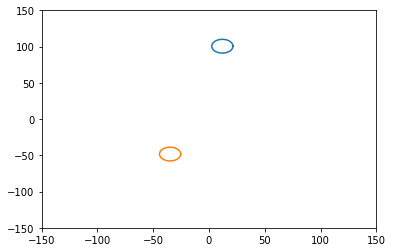

<Figure size 432x288 with 0 Axes>

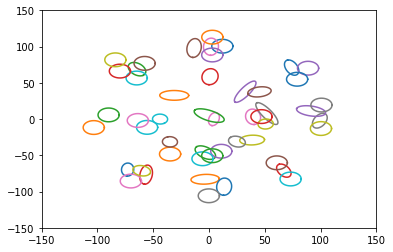

<Figure size 432x288 with 0 Axes>

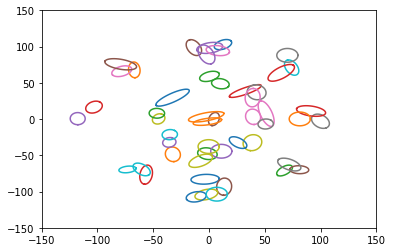

<Figure size 432x288 with 0 Axes>

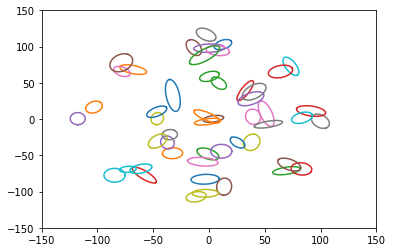

<Figure size 432x288 with 0 Axes>

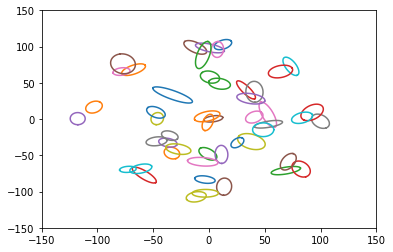

<Figure size 432x288 with 0 Axes>

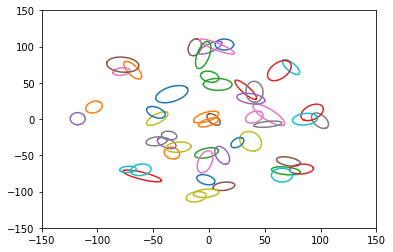

<Figure size 432x288 with 0 Axes>

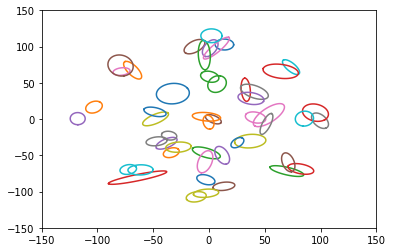

<Figure size 432x288 with 0 Axes>

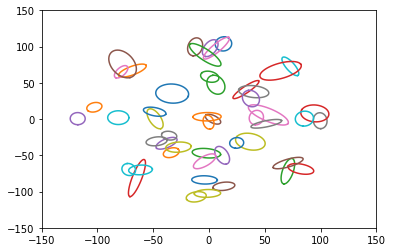

<Figure size 432x288 with 0 Axes>

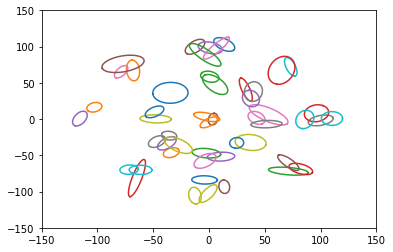

<Figure size 432x288 with 0 Axes>

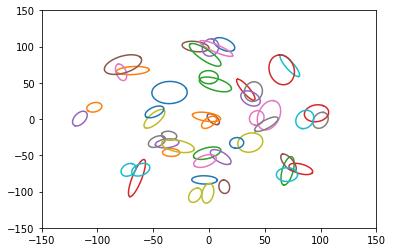

In [20]:
x,y=generatePointFromRandomCluster()
t=1
mut=np.array([x,y]).reshape(1,2)
vt=np.array([[10,0],[0,10]])
pit=1
G =np.array([mut,vt,pit],dtype=object).reshape(1,-1)
c=1
K=50
lmd=3
vd=10
maxIter=1000
G=IncrementClustering(G,1,1,K,lmd,10,maxIter)

<br><br><b>Q3. Gaussian Mixture Models 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import numpy as np
from sklearn.mixture import GaussianMixture as mix

In [22]:
#loading the data
from sklearn.datasets import fetch_openml
df = fetch_openml('mnist_784',version=1)

In [23]:
data = np.c_[df.data, df.target]
columns = np.append(df.feature_names, ["target"])
df1 = pd.DataFrame(data, columns=columns)
df1 = df1.astype(int)
df1.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  target  
0         0         0         0       5  
1         0         0         0       0  
2         0         0         0       4  
3         0         0         0       1  
4         0         0         0       9  

[5 rows x 785 columns]

In [24]:
#storing the labels
label=df1['target']
label=np.array(label).reshape(70000,1)
label.shape

(70000, 1)

In [25]:
#dropping the target column
df1=df1.drop('target',axis=1)
df1.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [26]:
#splitting the train and test data based on the class labels
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
for i in range(10):
    DF=[]
    idx=[]
    idx=np.copy(np.array(np.where(label[:,0] == i)).flatten())
    DF.append(df1.iloc[idx])
    DF=np.array(DF)
    DF=DF.reshape(-1,784)
    Y_train.append(label[idx[0:5000]])
    X_train.append(DF[0:5000])
    X_test.append(DF[5000:6000])
    Y_test.append(label[idx[5000:6000]])

In [27]:
X_train=np.array(X_train)
X_train=X_train.reshape(-10,784)
X_train.shape

(50000, 784)

In [28]:
X_test=np.array(X_test)
X_test=X_test.reshape(-10,784)
X_test.shape

(10000, 784)

In [29]:
#function for pca
def PCA(eigenvectors,y1,d):
    #taking the top d eigenvectors
    Q=eigenvectors#[:,:d]
    #projecting the training data to a lower dimension 
    v=np.dot(Q.T,y1.T).T
    return Q,v

In [30]:
#calculating the mean of each dimension of the training data
mu=X_train.mean(axis=0)
mu = mu.reshape((1,784))
mu.shape

(1, 784)

In [31]:
#Zero-Centering of Input Data Set 
y=X_train-mu

In [32]:
#computing the covariance matrix
C=np.cov(y.T)
C.shape

(784, 784)

In [33]:
#performing pca on train data
eigenvalues, eigenvectors = eigh(C)
d=236
idxr=np.argpartition(eigenvalues,-d)[-d:]
Q,v=PCA(eigenvectors[:,idxr],y,d)

In [34]:
v.shape

(50000, 236)

<br><b>GMM for k=1

In [35]:
m=[]
for i in range(10):
    a=i*5000
    b=(i+1)*5000
    m.append(mix(n_components = 1, init_params='kmeans',n_init = 1, max_iter = 200, covariance_type = 'diag').fit(v[a:b,:]))

In [36]:
#mean separation on the test data
w=X_test-mu
#projecting the test data to lower dimension
V=np.dot(w,Q)

#Evaluating the scores for each test data
p=np.zeros((10000,10))
for i in range(10000):
    for j in range(10):
        s=m[j].score_samples(V[i,:].reshape(1,d))
        p[i,j]=s

#prediction
pred=[]
for i in range(10000):
    pred.append(np.argmax(p[i,:]))

#evaluating the accuracy
TP=[0,0,0,0,0,0,0,0,0,0]
TPFP=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(pred)):
    TPFP[pred[i]]+=1
    true_label=i//1000
    if(pred[i]==true_label):
        TP[pred[i]]+=1
#Accuracy
A=(sum(TP)/10000)*100

#precison
P=np.array(TP)/np.array(TPFP)

#recall
R=np.array(TP)/1000

#F1 Score
F=(2/(np.reciprocal(P)+np.reciprocal(R)))

print("K=1:\n","Accuracy: ",A,"\nF1 Score: ",F)

K=1:
 Accuracy:  85.35000000000001 
F1 Score:  [0.92857143 0.94742215 0.73729176 0.83011392 0.86483687 0.82871795
 0.90542636 0.86849168 0.84071247 0.81078479]


<br><b>GMM for k=5

In [37]:
m=[]
for i in range(10):
    a=i*5000
    b=(i+1)*5000
    m.append(mix(n_components = 5, init_params='kmeans',n_init = 1, max_iter = 200, covariance_type = 'diag').fit(v[a:b,:]))

In [38]:
#mean separation on the test data
w=X_test-mu
#projecting the test data to lower dimension
V=np.dot(w,Q)

#Evaluating the scores for each test data
p=np.zeros((10000,10))
for i in range(10000):
    for j in range(10):
        s=m[j].score_samples(V[i,:].reshape(1,d))
        p[i,j]=s

#prediction
pred=[]
for i in range(10000):
    pred.append(np.argmax(p[i,:]))

#evaluating the accuracy
TP=[0,0,0,0,0,0,0,0,0,0]
TPFP=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(pred)):
    TPFP[pred[i]]+=1
    true_label=i//1000
    if(pred[i]==true_label):
        TP[pred[i]]+=1
#Accuracy
A=(sum(TP)/10000)*100

#precison
P=np.array(TP)/np.array(TPFP)

#recall
R=np.array(TP)/1000

#F1 Score
F=(2/(np.reciprocal(P)+np.reciprocal(R)))

print("K=5:\n","Accuracy: ",A,"\nF1 Score: ",F)

K=5:
 Accuracy:  89.60000000000001 
F1 Score:  [0.94768918 0.9721519  0.91069676 0.86607143 0.90044577 0.85980392
 0.93902439 0.85423038 0.88003885 0.83111566]


<br><b>GMM for k=10

In [39]:
m=[]
for i in range(10):
    a=i*5000
    b=(i+1)*5000
    m.append(mix(n_components = 10, init_params='kmeans',n_init = 1, max_iter = 200, covariance_type = 'diag').fit(v[a:b,:]))

In [40]:
#mean separation on the test data
w=X_test-mu
#projecting the test data to lower dimension
V=np.dot(w,Q)

#Evaluating the scores for each test data
p=np.zeros((10000,10))
for i in range(10000):
    for j in range(10):
        s=m[j].score_samples(V[i,:].reshape(1,d))
        p[i,j]=s

#prediction
pred=[]
for i in range(10000):
    pred.append(np.argmax(p[i,:]))

#evaluating the accuracy
TP=[0,0,0,0,0,0,0,0,0,0]
TPFP=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(pred)):
    TPFP[pred[i]]+=1
    true_label=i//1000
    if(pred[i]==true_label):
        TP[pred[i]]+=1
#Accuracy
A=(sum(TP)/10000)*100

#precison
P=np.array(TP)/np.array(TPFP)

#recall
R=np.array(TP)/1000

#F1 Score
F=(2/(np.reciprocal(P)+np.reciprocal(R)))

print("K=10:\n","Accuracy: ",A,"\nF1 Score: ",F)

K=10:
 Accuracy:  89.49000000000001 
F1 Score:  [0.95107034 0.96621281 0.90379872 0.85857071 0.89994972 0.86449733
 0.9441675  0.86166411 0.86792453 0.833     ]


<br><b>GMM for k=20

In [41]:
m=[]
for i in range(10):
    a=i*5000
    b=(i+1)*5000
    m.append(mix(n_components = 20, init_params='kmeans',n_init = 1, max_iter = 200, covariance_type = 'diag').fit(v[a:b,:]))

In [42]:
#mean separation on the test data
w=X_test-mu
#projecting the test data to lower dimension
V=np.dot(w,Q)

#Evaluating the scores for each test data
p=np.zeros((10000,10))
for i in range(10000):
    for j in range(10):
        s=m[j].score_samples(V[i,:].reshape(1,d))
        p[i,j]=s

#prediction
pred=[]
for i in range(10000):
    pred.append(np.argmax(p[i,:]))

#evaluating the accuracy
TP=[0,0,0,0,0,0,0,0,0,0]
TPFP=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(pred)):
    TPFP[pred[i]]+=1
    true_label=i//1000
    if(pred[i]==true_label):
        TP[pred[i]]+=1
#Accuracy
A=(sum(TP)/10000)*100

#precison
P=np.array(TP)/np.array(TPFP)

#recall
R=np.array(TP)/1000

#F1 Score
F=(2/(np.reciprocal(P)+np.reciprocal(R)))

print("K=20:\n","Accuracy: ",A,"\nF1 Score: ",F)

K=20:
 Accuracy:  90.03999999999999 
F1 Score:  [0.95656566 0.95912263 0.91753086 0.86978131 0.90464304 0.86769845
 0.95333668 0.86466942 0.87432233 0.83656234]


<br><b>GMM for k=30

In [43]:
m=[]
for i in range(10):
    a=i*5000
    b=(i+1)*5000
    m.append(mix(n_components = 30, init_params='kmeans',n_init = 1, max_iter = 200, covariance_type = 'diag').fit(v[a:b,:]))

In [44]:
#mean separation on the test data
w=X_test-mu
#projecting the test data to lower dimension
V=np.dot(w,Q)

#Evaluating the scores for each test data
p=np.zeros((10000,10))
for i in range(10000):
    for j in range(10):
        s=m[j].score_samples(V[i,:].reshape(1,d))
        p[i,j]=s

#prediction
pred=[]
for i in range(10000):
    pred.append(np.argmax(p[i,:]))

#evaluating the accuracy
TP=[0,0,0,0,0,0,0,0,0,0]
TPFP=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(pred)):
    TPFP[pred[i]]+=1
    true_label=i//1000
    if(pred[i]==true_label):
        TP[pred[i]]+=1
#Accuracy
A=(sum(TP)/10000)*100

#precison
P=np.array(TP)/np.array(TPFP)

#recall
R=np.array(TP)/1000

#F1 Score
F=(2/(np.reciprocal(P)+np.reciprocal(R)))

print("K=30:\n","Accuracy: ",A,"\nF1 Score: ",F)

K=30:
 Accuracy:  91.51 
F1 Score:  [0.96446701 0.96344517 0.92460317 0.88319369 0.90918214 0.886
 0.95656515 0.89342172 0.90254873 0.86896552]


<br><b>GMM for k=40

In [45]:
m=[]
for i in range(10):
    a=i*5000
    b=(i+1)*5000
    m.append(mix(n_components = 40, init_params='kmeans',n_init = 1, max_iter = 200, covariance_type = 'diag').fit(v[a:b,:]))

In [46]:
#mean separation on the test data
w=X_test-mu
#projecting the test data to lower dimension
V=np.dot(w,Q)

#Evaluating the scores for each test data
p=np.zeros((10000,10))
for i in range(10000):
    for j in range(10):
        s=m[j].score_samples(V[i,:].reshape(1,d))
        p[i,j]=s

#prediction
pred=[]
for i in range(10000):
    pred.append(np.argmax(p[i,:]))

#evaluating the accuracy
TP=[0,0,0,0,0,0,0,0,0,0]
TPFP=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(pred)):
    TPFP[pred[i]]+=1
    true_label=i//1000
    if(pred[i]==true_label):
        TP[pred[i]]+=1
#Accuracy
A=(sum(TP)/10000)*100

#precison
P=np.array(TP)/np.array(TPFP)

#recall
R=np.array(TP)/1000

#F1 Score
F=(2/(np.reciprocal(P)+np.reciprocal(R)))

print("K=40:\n","Accuracy: ",A,"\nF1 Score: ",F)

K=40:
 Accuracy:  91.67 
F1 Score:  [0.96607595 0.97338021 0.9388364  0.88514851 0.9164149  0.87715836
 0.95508982 0.8954918  0.90254873 0.85882932]


<br><b>GMM for k=50

In [47]:
m=[]
for i in range(10):
    a=i*5000
    b=(i+1)*5000
    m.append(mix(n_components = 50, init_params='kmeans',n_init = 1, max_iter = 200, covariance_type = 'diag').fit(v[a:b,:]))

In [48]:
#mean separation on the test data
w=X_test-mu
#projecting the test data to lower dimension
V=np.dot(w,Q)

#Evaluating the scores for each test data
p=np.zeros((10000,10))
for i in range(10000):
    for j in range(10):
        s=m[j].score_samples(V[i,:].reshape(1,d))
        p[i,j]=s

#prediction
pred=[]
for i in range(10000):
    pred.append(np.argmax(p[i,:]))

#evaluating the accuracy
TP=[0,0,0,0,0,0,0,0,0,0]
TPFP=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(pred)):
    TPFP[pred[i]]+=1
    true_label=i//1000
    if(pred[i]==true_label):
        TP[pred[i]]+=1
#Accuracy
A=(sum(TP)/10000)*100

#precison
P=np.array(TP)/np.array(TPFP)

#recall
R=np.array(TP)/1000

#F1 Score
F=(2/(np.reciprocal(P)+np.reciprocal(R)))

print("K=50:\n","Accuracy: ",A,"\nF1 Score: ",F)

K=50:
 Accuracy:  91.84 
F1 Score:  [0.96423174 0.97243108 0.93512974 0.88613861 0.91573604 0.88064193
 0.95956066 0.90348661 0.89890981 0.86909449]
